# Homework solution: Salary increase



## Inputs, outputs and weights

In [1]:
import numpy as np
inputs = np.array([[18,2], [20,3], [21,4], [35,15], [36,16], [38,18]])
outputs = np.array([0, 0, 0, 1, 1, 1])
weights = np.array([0.0, 0.0])
learning_rate = 0.1

## MinMax scaler

In [2]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
inputs = sc.fit_transform(inputs)

In [3]:
print(inputs)

[[0.     0.    ]
 [0.1    0.0625]
 [0.15   0.125 ]
 [0.85   0.8125]
 [0.9    0.875 ]
 [1.     1.    ]]


## Step function

In [4]:
def step_function(sum):
  if sum >= 1:
    return 1
  return 0

## Calculate output

In [5]:
def calculate_output(instance):
  s = instance.dot(weights)
  return step_function(s)

## Train

In [6]:
def train():
  total_error = 1
  while total_error != 0:
    total_error = 0
    for i in range(len(outputs)):
      prediction = calculate_output(inputs[i])
      error = abs(outputs[i] - prediction)
      total_error += error
      if error > 0:
        for j in range(len(weights)):
          weights[j] = weights[j] + (learning_rate * inputs[i][j] * error)
          print('Weight updated: ' + str(weights[j]))  
    print('Total error: ' + str(total_error))


In [7]:
train()

Weight updated: 0.085
Weight updated: 0.08125
Weight updated: 0.17500000000000002
Weight updated: 0.16875
Weight updated: 0.275
Weight updated: 0.26875000000000004
Total error: 3
Weight updated: 0.36000000000000004
Weight updated: 0.35000000000000003
Weight updated: 0.45000000000000007
Weight updated: 0.43750000000000006
Weight updated: 0.55
Weight updated: 0.5375000000000001
Total error: 3
Weight updated: 0.635
Weight updated: 0.6187500000000001
Total error: 1
Total error: 0


## Graph

In [8]:
import pandas as pd
df1 = pd.DataFrame(data=inputs, columns=['age', 'educational'])
print(df1)

    age  educational
0  0.00       0.0000
1  0.10       0.0625
2  0.15       0.1250
3  0.85       0.8125
4  0.90       0.8750
5  1.00       1.0000


In [9]:
df2 = pd.DataFrame(data=outputs, columns=['class'])
print(df2)

   class
0      0
1      0
2      0
3      1
4      1
5      1


In [10]:
df = pd.concat([df1, df2], axis=1)
print(df)

    age  educational  class
0  0.00       0.0000      0
1  0.10       0.0625      0
2  0.15       0.1250      0
3  0.85       0.8125      1
4  0.90       0.8750      1
5  1.00       1.0000      1


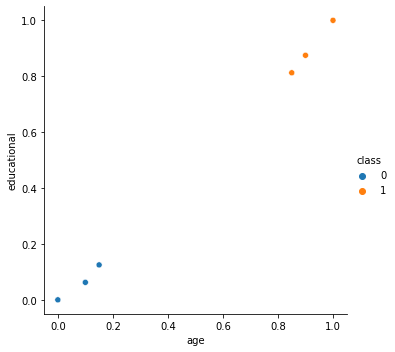

In [11]:
import seaborn as sns
sns.relplot(x='age', y='educational', data=df, hue='class')

## Classification

In [12]:
print(weights)

[0.635   0.61875]


In [13]:
test_inputs = np.array([[17,5], [25,8], [45,10], [31,20]])
test_inputs = sc.transform(test_inputs)

In [14]:
for i in range(len(test_inputs)):
  print(calculate_output(test_inputs[i]))

0
0
1
1
